# Basic Numerical Methods


## 1. Least Squares Method and Regression Analysis



### a. Least Squares Method

The least squares method minimizes the sum of squared differences between observed and predicted values. It's used to find the best-fitting line in regression analysis.

Mathematically:
$$
	{Error} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
Where:
$$
(y_i) = actual value
$$
$$
(\hat{y}_i) = predicted value$$
$$
    


### b. Simple Linear Regression Example

Goal of Linear Regression:

We want to find the best-fitting line: \( y = mx + b \)


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
Design Matrix A:
 [[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]]
Slope (m): 0.7499999999999999
Intercept (b): 1.3899999999999992
Residuals: [0.027]
Rank of matrix A: 2
Singular values of A: [7.69121313 0.91936964]


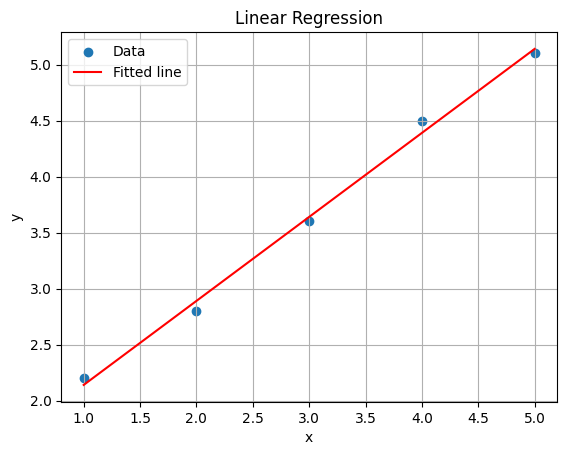

In [6]:
# Install missing plotting library (use Jupyter magic so package is available in this notebook)
%pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt # type: ignore

# Step 1: Design matrix construction based on data points
x = np.array([1, 2, 3, 4, 5])
y = np.array([2.2,2.8,3.6,4.5,5.1])

# Step 2: Build matrix A: Each row represents the linear model y=mx+c.
A = np.vstack([x, np.ones(len(x))]).T # Stack x and a column of ones and then transpose it
print ("Design Matrix A:\n", A) # The first column is the value of x. The second column is always 1, which allows us to solve for the intercept c.

# Step 3: Fit line using least squares- it solves for the slope m and intercept c of the best-fit line
# np.linalg.lstsq returns a tuple (coeffs, residuals, rank, s), so unpack accordingly.
coeffs, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)
m = coeffs[0]
b = coeffs[1]

# Step 4: Output the results and plot them
print("Slope (m):", m)
print("Intercept (b):", b)
print("Residuals:", residuals)
print("Rank of matrix A:", rank)
print("Singular values of A:", s) 

plt.scatter(x, y, label='Data')
plt.plot(x, m*x + b, 'r', label='Fitted line')
plt.legend()
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


#### Exercise- Make up a set of data and find their best fit using least squares linear regression.

Design Matrix A:
 [[6. 1.]
 [7. 1.]
 [6. 1.]
 [9. 1.]
 [4. 1.]]
Slope (m): -0.15151515151515144
Intercept (b): 4.169696969696969
Residuals: [9.6969697]
Rank of matrix A: 2
Singular values of A: [14.92325843  0.5443877 ]


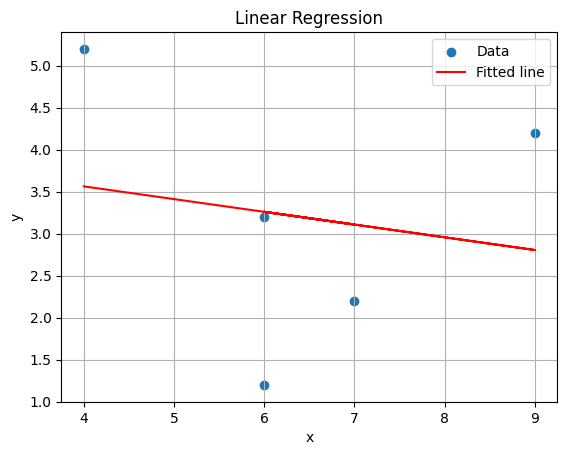

In [2]:
import numpy as np
import matplotlib.pyplot as plt # type: ignore

# Step 1: Design matrix construction based on data points

x = np.array([6, 7, 6, 9, 4])
y = np.array([1.2, 2.2, 3.2, 4.2, 5.2])

# Step 2: Build matrix A: Each row represents the linear model y=mx+c.
A = np.vstack([x, np.ones(len(x))]).T # Stack x and a column of ones and then transpose it
print ("Design Matrix A:\n", A) # The first column is the value of x. The second column is always 1, which allows us to solve for the intercept c.

# Step 3: Fit line using least squares- it solves for the slope m and intercept c of the best-fit line
# np.linalg.lstsq returns a tuple (coeffs, residuals, rank, s), so unpack accordingly.
coeffs, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)
m = coeffs[0]
b = coeffs[1]

# Step 4: Output the results and plot them
print("Slope (m):", m)
print("Intercept (b):", b)
print("Residuals:", residuals)
print("Rank of matrix A:", rank)
print("Singular values of A:", s) 

plt.scatter(x, y, label='Data')
plt.plot(x, m*x + b, 'r', label='Fitted line')
plt.legend()
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


## 2. Root Finding Methods in Numerical Analysis

This notebook demonstrates two popular numerical methods for finding roots of equations:

1. **Bisection Method**
2. **Newton-Raphson Method**

We will use the function:
\[ f(x) = x^3 - 2x - 5 \]



### a. Bisection Method

The Bisection Method is a simple and robust technique for finding roots of a continuous function. It works by repeatedly halving an interval and selecting the subinterval in which the function changes sign.

#### Algorithm Steps:
1. Define the function f(x)
2. Choose interval [a, b] where f(a) * f(b) < 0
3. Repeat until convergence:
   - Compute midpoint c = (a + b)/2
   - Evaluate f(c)
   - If f(c) * f(a) < 0, set b = c
   - Else, set a = c
   - Stop when |f(c)| is small enough


Root found using Bisection Method: 2.094551481306553
f(root) = -2.6315731815884646e-09


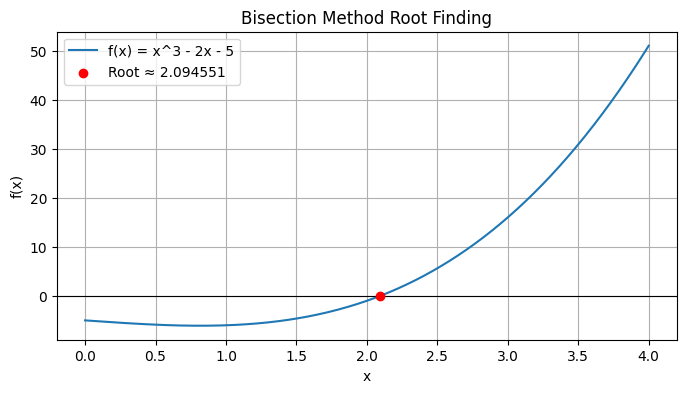

In [4]:
# Complete the Bisection Method implementation
import numpy as np
import matplotlib.pyplot as plt # type: ignore

def f(x):
    return x**3 - 2*x - 5

def bisection(f, a, b, tol=1e-8, max_iter=100):
    fa = f(a)
    fb = f(b)
    if fa * fb > 0:
        raise ValueError("f(a) and f(b) must have opposite signs")
    for _ in range(max_iter):
        c = (a + b) / 2.0
        fc = f(c)
        if abs(fc) < tol or (b - a) / 2.0 < tol:
            return c
        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
    return (a + b) / 2.0

# choose interval [2, 3] because f(2)<0 and f(3)>0
root_bisection = bisection(f, 2.0, 3.0)
print("Root found using Bisection Method:", root_bisection)
print("f(root) =", f(root_bisection))

# Your code to plot the function and the root found
xs = np.linspace(0, 4, 400)
ys = f(xs)

plt.figure(figsize=(8, 4))
plt.plot(xs, ys, label='f(x) = x^3 - 2x - 5')
plt.axhline(0, color='k', linewidth=0.8)
plt.scatter([root_bisection], [f(root_bisection)], color='red', zorder=5, label=f'Root ≈ {root_bisection:.6f}')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Bisection Method Root Finding')
plt.grid(True)
plt.show()



### b. Newton-Raphson Method

The Newton-Raphson Method is an efficient technique for finding roots using the function's derivative.

#### Algorithm Steps:
1. Define the function and its deriative

2. Start with an initial guess \( x_0 \).

3. Repeat 
   Compute the next approximation using:

   $$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$

   Until:

   $$ |x_{n+1} - x_n| < \varepsilon $$

4. Return the final approximation $$ x_{n+1} $$ as the root.



In [7]:
# Complete the Newton-Raphson Method implementation
import math
def f(x):
    return x**3 - 2*x - 5

def df(x):
    return 3*x**2 - 2

def newton_raphson(f, df, x0, tol=1e-10, max_iter=100):
    x = x0
    for _ in range(max_iter):
        dfx = df(x)
        if dfx == 0:
            raise ZeroDivisionError("Derivative is zero. No convergence.")
        x_new = x - f(x) / dfx
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    raise RuntimeError("Newton-Raphson did not converge within max_iter")

# Use previous bisection root as initial guess if available, otherwise a default guess
try:
    x0 = root_bisection
except NameError:
    x0 = 2.5

root_newton = newton_raphson(f, df, x0)
print("Root found using Newton-Raphson Method:", root_newton)


Root found using Newton-Raphson Method: 2.0945514815423265


### Root finding exercise: Beam Deflection

A simply supported beam of length (L = 10m ) is subjected to a uniformly distributed load w = 5 kN/m. The deflection y(x) of the beam at a distance x from the left support is given by:

$$
y(x) = \frac{w}{24EI} \, x \left( L^3 - 2Lx^2 + x^3 \right)
$$

#### 🎯 Task:
Use a root-finding method (e.g., Newton-Raphson or Bisection) to find the position \( x \) along the beam where the **maximum deflection** occurs.

#### 💡 Hint:
To find the maximum deflection:
1. Compute the derivative y'(x) 
2. Solve y'(x) = 0  within the interval x in [0, L] 

#### 📌 Constants:
- L = 10 
- w = 5 
- E and I are constants (you may assume EI = 1 for simplicity)

Position of maximum deflection x = 5.000000000000 m
Maximum deflection y = 6.510416666667e+02 (with EI = 1.0)
Second derivative at root y'' = -6.250000e+01 (negative => maximum)


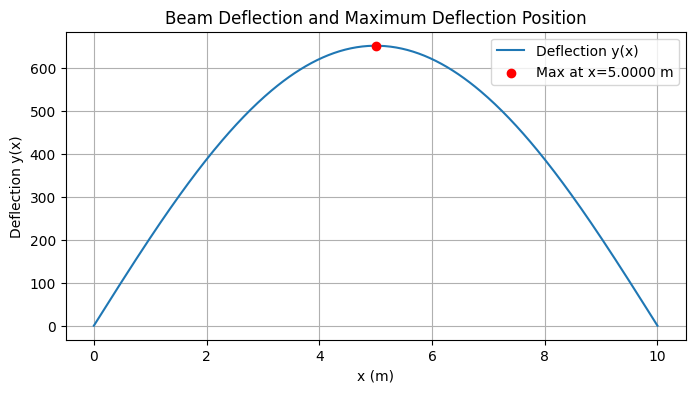

In [ ]:

L = 10.0
w = 5.0
EI = 1.0  
k = w / (24.0 * EI)

def y(x):
	return k * (L**3 * x - 2 * L * x**3 + x**4)

def dy(x):
	return k * (L**3 - 6 * L * x**2 + 4 * x**3)

try:
	bisection 
except NameError:
	def bisection(f, a, b, tol=1e-8, max_iter=100):
		fa = f(a)
		fb = f(b)
		if fa * fb > 0:
			raise ValueError("f(a) and f(b) must have opposite signs")
		for _ in range(max_iter):
			c = (a + b) / 2.0
			fc = f(c)
			if abs(fc) < tol or (b - a) / 2.0 < tol:
				return c
			if fa * fc < 0:
				b = c
				fb = fc
			else:
				a = c
				fa = fc
		return (a + b) / 2.0

root_x = bisection(dy, 0.0, L, tol=1e-12, max_iter=1000)

max_deflection = y(root_x)
y2_at_root = 12 * k * root_x * (root_x - L) 

print(f"Position of maximum deflection x = {root_x:.12f} m")
print(f"Maximum deflection y = {max_deflection:.12e} (with EI = {EI})")
print(f"Second derivative at root y'' = {y2_at_root:.6e} (negative => maximum)")

xs = np.linspace(0, L, 400)
ys = y(xs)

plt.figure(figsize=(8,4))
plt.plot(xs, ys, label='Deflection y(x)')
plt.scatter([root_x], [max_deflection], color='red', zorder=5, label=f'Max at x={root_x:.4f} m')
plt.xlabel('x (m)')
plt.ylabel('Deflection y(x)')
plt.title('Beam Deflection and Maximum Deflection Position')
plt.legend()
plt.grid(True)
plt.show()
Solve for position x of maximum deflection for a simply supported beam

try:
	np
except NameError:
	import numpy as np
try:
	plt
except NameError:
	import matplotlib.pyplot as plt 

L = 10.0
w = 5.0
EI = 1.0  
k = w / (24.0 * EI)

def y(x):
	return k * (L**3 * x - 2 * L * x**3 + x**4)

def dy(x):
	return k * (L**3 - 6 * L * x**2 + 4 * x**3)

try:
	bisection 
except NameError:
	def bisection(f, a, b, tol=1e-8, max_iter=100):
		fa = f(a)
		fb = f(b)
		if fa * fb > 0:
			raise ValueError("f(a) and f(b) must have opposite signs")
		for _ in range(max_iter):
			c = (a + b) / 2.0
			fc = f(c)
			if abs(fc) < tol or (b - a) / 2.0 < tol:
				return c
			if fa * fc < 0:
				b = c
				fb = fc
			else:
				a = c
				fa = fc
		return (a + b) / 2.0

root_x = bisection(dy, 0.0, L, tol=1e-12, max_iter=1000)

max_deflection = y(root_x)
y2_at_root = 12 * k * root_x * (root_x - L) 

print(f"Position of maximum deflection x = {root_x:.12f} m")
print(f"Maximum deflection y = {max_deflection:.12e} (with EI = {EI})")
print(f"Second derivative at root y'' = {y2_at_root:.6e} (negative => maximum)")

xs = np.linspace(0, L, 400)
ys = y(xs)

plt.figure(figsize=(8,4))
plt.plot(xs, ys, label='Deflection y(x)')
plt.scatter([root_x], [max_deflection], color='red', zorder=5, label=f'Max at x={root_x:.4f} m')
plt.xlabel('x (m)')
plt.ylabel('Deflection y(x)')
plt.title('Beam Deflection and Maximum Deflection Position')
plt.legend()
plt.grid(True)
plt.show()
